In [1]:
from pylab import *

In [2]:
def Mat_A_inv(Nx,r):
    A = zeros((Nx,Nx))
    dd , m_r = 2*(1+r) , -r
    for i in range(Nx-1):
        A[i,i] = dd
        A[i+1,i] = m_r
        A[i,i+1] = m_r
    A[-1,-1] = dd
    A_inv = inv(A)
    return A_inv

def Mat_B(Nx,r):
    B = zeros((Nx,Nx))
    dd = 2*(1-r)
    for i in range(Nx-1):
        B[i,i] = dd
        B[i+1,i] = r
        B[i,i+1] = r
    B[-1,-1] = dd
    return B

Para los puntos interiores $\tilde \Psi$ se tiene que:

$$
\tilde \Psi ^N = \left( \Pi _{i=0} ^N \mathbb{A}^{-1} \mathbb{B} \right) \tilde \Psi^0
$$

Recordar que $r=\frac{D \Delta t}{\Delta x^2}$ y además $r<1$ para tener convergencia.

In [3]:
def Crank_Nicolson(Psi0,x,t,D=1):
    dt , dx = t[1]-t[0] , x[1]-x[0]
    Psi_total = zeros((len(t),len(Psi0)))
    Psi_total[0,:] = Psi0 
    r = D*dt/(dx**2)
    if r < 1:
        print('Voy a evolucionar con valor r= %2.2f' %r)
        Nx = len(Psi0[1:-1])
        Ainv , B = Mat_A_inv(Nx,r) , Mat_B(Nx,r)
        Ainv_B = dot(Ainv,B)
        for i in range(len(t)-1):
            Psi_total[i+1,1:-1] = dot(Ainv_B,Psi_total[i,1:-1])
    else:
        print('Valor de r= %2.2f no convergente' %r)
    return Psi_total

Voy a evolucionar con valor r= 0.67


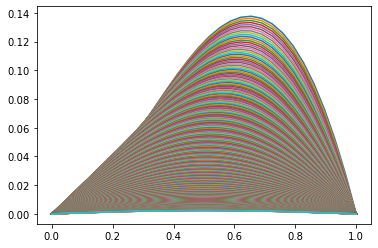

In [4]:
x = linspace(0,1,30)
t = linspace(0,0.4,500)
Psi0 = -x*(x-1)*sin(x)
Psi_total = Crank_Nicolson(Psi0,x,t)

for i in range(len(t)):
    plot(x,Psi_total[i,:])
show()

In [5]:
XX,TT = meshgrid(x,t)

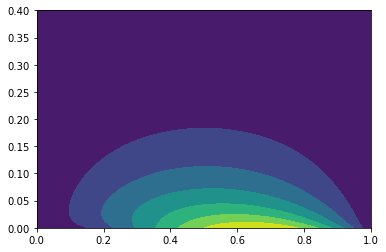

In [6]:
contourf(XX,TT,Psi_total)
show()

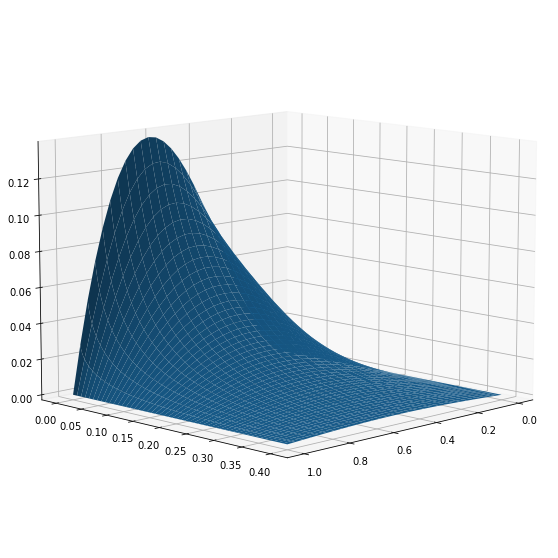

In [7]:
fig,ejes = subplots(subplot_kw={"projection":"3d"},figsize=(10,10))
ejes.plot_surface(XX,TT,Psi_total)
ejes.view_init(10,45)
show()